Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("D:/Scaler/Python/Dataset/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



### Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary ###

In [85]:
# Filtering Data Column wise so that each row has one director,one genre,one actor, one country

# 1. Separting Casts in each column
constraint2=df["cast"].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()


,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [86]:
# Filtering Data Column wise so that each row has one director,one genre,one actor, one country

# 1. Separting Casts in each column

# Step 1: Split the 'cast' column and create a new DataFrame
df_new2 = pd.DataFrame(df['cast'].str.split(', ').tolist(), index=df['title']).stack()

# Step 2: Reset index and rename columns
df_new2 = df_new2.reset_index()
df_new2.columns = ['title', 'level_1', 'Actors']  # 'level_1' here represents the original index column, which can be dropped if unnecessary
df_new2.drop(['level_1'], axis=1, inplace=True)  # Drop the original index column if not needed

# Display the first few rows
# print(df_new2.head())
df_new2.head()

,title,Actors
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
1,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
2,Kota Factory,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."
3,Midnight Mass,"[Kate Siegel, Zach Gilford, Hamish Linklater, ..."
4,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,..."


In [87]:
# 2.Separting Country in each column

# Step 1: Convert NaN values to empty strings and split the 'country' column
df['country'] = df['country'].fillna('').astype(str).str.split(', ')

# # Step 2: Create a new DataFrame by stacking and resetting index
df_new3 = pd.DataFrame(df['country'].tolist(), index=df['title']).stack().reset_index()


# # Step 3: Rename columns and drop unnecessary columns

df_new3.rename(columns={0:"country"},inplace=True)
df_new3.drop(columns="level_1",axis=1,inplace=True)

# # Display the first few rows
df_new3.head()


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,
3,Jailbirds New Orleans,
4,Kota Factory,India


In [88]:
# 3. Separting Genres in each column

# Step 1: Split the 'listed_in' column and create a new DataFrame
df_new4 = pd.DataFrame(df['listed_in'].str.split(', ').tolist(), index=df['title']).stack()

# Step 2: Reset index and rename columns
df_new4 = df_new4.reset_index()
df_new4.columns = ['title','level_1', 'Genre']  # 'level_1' represents the original index column, which can be dropped if unnecessary
df_new4.drop(['level_1'], axis=1, inplace=True)  # Drop the original index column if not needed

# Display the first few rows
df_new4.head()


,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [89]:
# 5. Separting Directors in each column


# Step 1: Convert the 'director' column to string, handling NaN values
df['director'] = df['director'].astype(str)

# Step 2: Split the 'director' column and create a new DataFrame
df_new5 = pd.DataFrame(df['director'].str.split(', ').tolist(), index=df['title']).stack()

# Step 3: Reset index and rename columns
df_new5 = df_new5.reset_index()
df_new5.columns = ['title', 'level_1', 'director']  # 'level_1' represents the original index column, which can be dropped if unnecessary
df_new5.drop(['level_1'], axis=1, inplace=True)  # Drop the original index column if not needed

# Display the first few rows
df_new5.head()


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [90]:
#merging actor and country

df1=pd.merge(df_new2,df_new3,on="title",how="inner")

#merging df1 and genre
df2=pd.merge(df1,df_new4,on="title",how="inner")

#merging df2 and director
df3=pd.merge(df2,df_new5,on="title",how="inner")

In [91]:
df3.head()

,title,Actors,country,Genre,director
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,nan
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,nan
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,nan
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq


In [92]:
# Replace NAN values

df3["director"].replace(["nan"],["UnKnown Director"],inplace=True)

df3["Actors"].replace(["nan"],["Unknown Actor"],inplace=True)

df3["country"].replace(["nan"],[np.nan],inplace=True)

In [93]:
df3.head()

,title,Actors,country,Genre,director
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq


In [94]:
# Joining above merged data with original data i.e df

df_final=df3.merge(df[["title","show_id","type","date_added","release_year","rating","duration"]],on="title",how="left")

In [95]:
df_final

,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
23739,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Children & Family Movies,Peter Hewitt,s8806,Movie,"January 11, 2020",2006,PG,88 min
23740,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Comedies,Peter Hewitt,s8806,Movie,"January 11, 2020",2006,PG,88 min
23741,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,Dramas,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
23742,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,International Movies,Mozez Singh,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [96]:
## making new column Month i,e extracting month from Date_added column

# Convert "date_added" to string to handle potential NaN values
df_final["date_added"] = df_final["date_added"].astype(str)

# Extracting the month from "date_added"
df_final["month"] = df_final["date_added"].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# Displaying the first few rows to verify the result
df_final.head()


,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration,month
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,September
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,September


In [296]:
# Directly filtering the DataFrame for Movies and TV Shows
df_final_movies = df_final[df_final["type"] == "Movie"]
df_final_season = df_final[df_final["type"] == "TV Show"]

# Displaying the first few rows to verify the result
df_final_movies.head()


,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration,month
12,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,Robert Cullen,s7,Movie,"September 24, 2021",2021,PG,91 min,September
13,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,José Luis Ucha,s7,Movie,"September 24, 2021",2021,PG,91 min,September
14,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Dramas,Haile Gerima,s8,Movie,"September 24, 2021",1993,TV-MA,125 min,September
15,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Independent Movies,Haile Gerima,s8,Movie,"September 24, 2021",1993,TV-MA,125 min,September
16,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,International Movies,Haile Gerima,s8,Movie,"September 24, 2021",1993,TV-MA,125 min,September


In [297]:
df_final_season.head()

,title,Actors,country,Genre,director,show_id,type,date_added,release_year,rating,duration,month
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,September
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,September
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,September


In [298]:
# droping  show_id and date_added column from both filtered movies and tv-shows
df_final_movies=df_final_movies.drop(columns=["show_id","date_added"])
df_final_season=df_final_season.drop(columns=["show_id","date_added"])

In [299]:
df_final_movies

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
12,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September
13,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September
14,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Dramas,Haile Gerima,Movie,1993,TV-MA,125 min,September
15,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Independent Movies,Haile Gerima,Movie,1993,TV-MA,125 min,September
16,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,International Movies,Haile Gerima,Movie,1993,TV-MA,125 min,September
...,...,...,...,...,...,...,...,...,...,...
23739,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Children & Family Movies,Peter Hewitt,Movie,2006,PG,88 min,January
23740,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Comedies,Peter Hewitt,Movie,2006,PG,88 min,January
23741,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,Dramas,Mozez Singh,Movie,2015,TV-14,111 min,March
23742,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March


In [300]:
df_final_season

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq,TV Show,2021,TV-MA,1 Season,September
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq,TV Show,2021,TV-MA,1 Season,September
...,...,...,...,...,...,...,...,...,...,...
23718,Zak Storm,"[Michael Johnston, Jessica Gee-George, Christi...",South Korea,Kids' TV,UnKnown Director,TV Show,2016,TV-Y7,3 Seasons,September
23719,Zak Storm,"[Michael Johnston, Jessica Gee-George, Christi...",Indonesia,Kids' TV,UnKnown Director,TV Show,2016,TV-Y7,3 Seasons,September
23725,Zindagi Gulzar Hai,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",Pakistan,International TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December
23726,Zindagi Gulzar Hai,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",Pakistan,Romantic TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December


### Defining Problem Statement and Analysing basic metrics

### Problem Statement: 

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries. By seeing the Data of netflix I observed Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. 1.How has the number of movies released per year changed over the last 20-30 years? 2.Comparison of tv shows vs. movies? 3.What is the best time to launch a TV show? 4.Analysis of actors/directors of different types of shows/movies. 5.Does Netflix has more focus on TV Shows than movies in recent years 6.Understanding what content is available in different countries

In [301]:
# original df 
df 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_str,listed_in_str
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,Documentaries
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[],"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,nan,NaN,[],"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,nan,NaN,[],"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,"Children & Family Movies, Comedies"


In [302]:
# Displaying concise summary of the DataFrame including the number of non-null entries, data types of each column, and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        8807 non-null   object
 1   type           8807 non-null   object
 2   title          8807 non-null   object
 3   director       8807 non-null   object
 4   cast           7982 non-null   object
 5   country        8807 non-null   object
 6   date_added     8797 non-null   object
 7   release_year   8807 non-null   int64 
 8   rating         8803 non-null   object
 9   duration       8804 non-null   object
 10  listed_in      8807 non-null   object
 11  description    8807 non-null   object
 12  country_str    8807 non-null   object
 13  listed_in_str  8807 non-null   object
dtypes: int64(1), object(13)
memory usage: 963.4+ KB


In [303]:
# Displaying the Movies DataFrame
df_final_movies

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
12,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,Robert Cullen,Movie,2021,PG,91 min,September
13,My Little Pony: A New Generation,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",,Children & Family Movies,José Luis Ucha,Movie,2021,PG,91 min,September
14,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Dramas,Haile Gerima,Movie,1993,TV-MA,125 min,September
15,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,Independent Movies,Haile Gerima,Movie,1993,TV-MA,125 min,September
16,Sankofa,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,International Movies,Haile Gerima,Movie,1993,TV-MA,125 min,September
...,...,...,...,...,...,...,...,...,...,...
23739,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Children & Family Movies,Peter Hewitt,Movie,2006,PG,88 min,January
23740,Zoom,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,Comedies,Peter Hewitt,Movie,2006,PG,88 min,January
23741,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,Dramas,Mozez Singh,Movie,2015,TV-14,111 min,March
23742,Zubaan,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,International Movies,Mozez Singh,Movie,2015,TV-14,111 min,March


In [304]:
# Displaying the TV shows DataFrame
df_final_season

,title,Actors,country,Genre,director,type,release_year,rating,duration,month
0,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
1,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
2,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Mysteries,UnKnown Director,TV Show,2021,TV-MA,2 Seasons,September
3,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,Crime TV Shows,Julien Leclercq,TV Show,2021,TV-MA,1 Season,September
4,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",,International TV Shows,Julien Leclercq,TV Show,2021,TV-MA,1 Season,September
...,...,...,...,...,...,...,...,...,...,...
23718,Zak Storm,"[Michael Johnston, Jessica Gee-George, Christi...",South Korea,Kids' TV,UnKnown Director,TV Show,2016,TV-Y7,3 Seasons,September
23719,Zak Storm,"[Michael Johnston, Jessica Gee-George, Christi...",Indonesia,Kids' TV,UnKnown Director,TV Show,2016,TV-Y7,3 Seasons,September
23725,Zindagi Gulzar Hai,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",Pakistan,International TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December
23726,Zindagi Gulzar Hai,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",Pakistan,Romantic TV Shows,UnKnown Director,TV Show,2012,TV-PG,1 Season,December


### Non-Graphical Analysis: Value counts and unique attributes

In [305]:
# Converting lists to strings in the 'country' and 'listed_in' columns
df['country_str'] = df['country'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
df['listed_in_str'] = df['listed_in'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Printing the number of unique values for each specified attribute
print(f"No. of ratings - {df['rating'].nunique()}")
print(f"Total Titles - {df['title'].nunique()}")
print(f"Total Directors - {df['director'].nunique()}")
print(f"Total countries - {df['country_str'].nunique()}")
print(f"Total years - {df['release_year'].nunique()}")
print(f"Total Genres - {df['listed_in_str'].nunique()}")


No. of ratings - 17
Total Titles - 8807
Total Directors - 4529
Total countries - 749
Total years - 74
Total Genres - 514


In [306]:
# ATTRIBUTES VALUE COUNTS 
print("********* Name of types on Netflix ************* ")
print(pd.DataFrame(df["type"].value_counts().reset_index()))




********* Name of types on Netflix ************* 
      type  count
0    Movie   6131
1  TV Show   2676


In [307]:
print("********* Name of country having shows on Netflix ************* ")
df_country_count = pd.DataFrame(df["country"].value_counts().reset_index()).rename(columns={'country':'Country'})
df_country_count


********* Name of country having shows on Netflix ************* 


,Country,count
0,[United States],2818
1,[India],972
2,[],831
3,[United Kingdom],419
4,[Japan],245
...,...,...
744,"[Romania, Bulgaria, Hungary]",1
745,"[Uruguay, Guatemala]",1
746,"[France, Senegal, Belgium]",1
747,"[Mexico, United States, Spain, Colombia]",1


In [308]:
print("********* Name of titles on Netflix ************* ")
df_title = pd.DataFrame(df["title"].value_counts().reset_index()).rename(columns={'title':'Title'})
df_title

********* Name of titles on Netflix ************* 


,Title,count
0,Dick Johnson Is Dead,1
1,Ip Man 2,1
2,Hannibal Buress: Comedy Camisado,1
3,Turbo FAST,1
4,Masha's Tales,1
...,...,...
8802,Love for Sale 2,1
8803,ROAD TO ROMA,1
8804,Good Time,1
8805,Captain Underpants Epic Choice-o-Rama,1


In [309]:
print("********* Name of Directors on Netflix from MOVIES ************* ")
df_movie_director = pd.DataFrame(df_final_movies["director"].value_counts().reset_index()).rename(columns={'director':'Director'})
df_movie_director

********* Name of Directors on Netflix from MOVIES ************* 


,Director,count
0,UnKnown Director,224
1,Youssef Chahine,46
2,Cathy Garcia-Molina,37
3,Martin Scorsese,36
4,Lars von Trier,33
...,...,...
4358,Alfred Gimeno,1
4359,Mike Fetterly,1
4360,Jeannie Gaffigan,1
4361,Chester Tam,1


In [310]:
print("********* Name of Directors on Netflix  From TV-SHOWS ************* ")
df_shows_director = pd.DataFrame(df_final_season["director"].value_counts().reset_index()).rename(columns={'director':'Director'})
df_shows_director

********* Name of Directors on Netflix  From TV-SHOWS ************* 


,Director,count
0,UnKnown Director,5605
1,Alastair Fothergill,24
2,Alejandro Lozano,9
3,Jay Oliva,9
4,Noam Murro,9
...,...,...
224,Sarjun,1
225,Nizar Shafi,1
226,Rathindran R Prasad,1
227,Arvind Swamy,1


In [311]:
print("********* Name of Actors on Netflix  From Movies ************* ")
df_actors = pd.DataFrame(df_final_movies["Actors"].value_counts().reset_index())
df_actors

********* Name of Actors on Netflix  From Movies ************* 


,Actors,count
0,"[Liam Neeson, Salma Hayek, John Krasinski, Fra...",100
1,"[Andy McAvin, James Faulkner, Luci Christian, ...",72
2,"[Tom Hanks, Halle Berry, Jim Broadbent, Hugo W...",36
3,"[Madeleine Coghlan, Savannah Kennick, Ruth Bra...",36
4,"[Anshuman Jha, Rajat Kapoor, Pooja Ruparel, Pi...",33
...,...,...
5440,[Tracy Morgan],1
5441,[Hasan Minhaj],1
5442,"[Ellie Kemper, Jane Krakowski, Tituss Burgess,...",1
5443,[Sarah Silverman],1


In [312]:
print("********* Name of Actors on Netflix  From TV-SHOWS ************* ")
df_shows_actor = pd.DataFrame(df_final_season["Actors"].value_counts().reset_index())
df_shows_actor

********* Name of Actors on Netflix  From TV-SHOWS ************* 


,Actors,count
0,[David Attenborough],82
1,"[André Holland, Joanna Kulig, Amandla Stenberg...",32
2,"[John Sparkes, Justin Fletcher, Kate Harbour, ...",24
3,"[Wen Chen-ling, River Huang, Lin He-xuan, Phoe...",21
4,"[Adinia Wirasti, Marissa Anita, Faradina Mufti...",15
...,...,...
2278,"[Sophia Isabella, Jeremy Levy, Jacob Tillman, ...",1
2279,"[Jeremy Shada, Tyler Labine, Bex Taylor-Klaus,...",1
2280,"[Preston Nyman, Sian Taylor, Ian Puleston-Davi...",1
2281,"[David Lodge, Patty Mattson, Doug Erholtz, Ste...",1


In [313]:
print("********* Name of Genres on Netflix from movies ************* ")

df_movies_genres = pd.DataFrame(df_final_movies["Genre"].value_counts().reset_index())
df_movies_genres



********* Name of Genres on Netflix from movies ************* 


,Genre,count
0,International Movies,3504
1,Dramas,3433
2,Comedies,2195
3,Action & Adventure,1295
4,Independent Movies,1156
5,Children & Family Movies,1024
6,Thrillers,843
7,Romantic Movies,742
8,Documentaries,650
9,Horror Movies,512


In [314]:
print("********* Name of Genres on Netflix from TV-SHOWS ************* ")

df_shows_genres = pd.DataFrame(df_final_season["Genre"].value_counts().reset_index())
df_shows_genres

********* Name of Genres on Netflix from TV-SHOWS ************* 


,Genre,count
0,International TV Shows,1392
1,TV Dramas,885
2,TV Comedies,618
3,Kids' TV,552
4,Crime TV Shows,464
5,Romantic TV Shows,373
6,British TV Shows,259
7,Docuseries,213
8,TV Action & Adventure,202
9,Spanish-Language TV Shows,191


### Visual Analysis - Univariate, Bivariate after pre-processing of the data 

#### considering the top data from both Movies and TV-SHOWS

#### 1. Movies




In [315]:

# Getting the top data for various attributes in movies
print("Top 3 Genres in Movies:")
top_3_genres = df_final_movies["Genre"].value_counts().index[:3]
print(top_3_genres)


Top 3 Genres in Movies:
Index(['International Movies', 'Dramas', 'Comedies'], dtype='object', name='Genre')


In [316]:
print("Top 10 Titles in Movies:")
top_10_titles = df_final_movies["title"].value_counts().index[:10]
top_10_titles



Top 10 Titles in Movies:


Index(['Kahlil Gibran's The Prophet', 'HALO Legends', 'Holidays',
       'Cloud Atlas', 'X: Past Is Present', 'Sincerely Yours, Dhaka',
       'Kon-Tiki', 'Olmo & the Seagull', 'The Endless Trench', 'Whisky'],
      dtype='object', name='title')

In [317]:
# print("Top 3 Actors in Movies:")
# top_3_actors = df_final_movies["Actors"].value_counts().index[:4]
# top_3_actors

# Drop rows with NaN values in the 'Actors' column
df_final_movies_cleaned = df_final_movies.dropna(subset=['Actors'])

# Flatten the lists in the 'Actors' column if it contains lists
df_final_movies_cleaned['Actors'] = df_final_movies_cleaned['Actors'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Print the top 3 actors in movies
print("Top 3 Actors in Movies:")
top_3_actors = df_final_movies_cleaned["Actors"].value_counts().index[:3]
print(top_3_actors)


Top 3 Actors in Movies:
Index(['Liam Neeson', 'Shah Rukh Khan', 'Akshay Kumar'], dtype='object', name='Actors')


In [318]:

print("Top 3 Directors in Movies:")
top_3_directors = df_final_movies["director"].value_counts().index[:3]
print(top_3_directors)



Top 3 Directors in Movies:
Index(['UnKnown Director', 'Youssef Chahine', 'Cathy Garcia-Molina'], dtype='object', name='director')


In [319]:
top_3_months = df_final_movies["month"].value_counts().index[:3] 
print("Top 3 Months in Movies:")
print(top_3_months)


Top 3 Months in Movies:
Index(['July', 'January', 'October'], dtype='object', name='month')


In [320]:
print("Top 3 Countries in Movies:")
top_3_countries = df_final_movies["country"].value_counts().index[:3]
top_3_countries



Top 3 Countries in Movies:


Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [321]:
print("Top 3 Ratings in Movies:")
top_3_ratings_movies = df_final_movies["rating"].value_counts().index[:3]
top_3_ratings_movies

# print("Top 3 Ratings in Movies:")
# top_3_ratings_movies_counts = df_final_movies["rating"].value_counts().head(3)
# print(top_3_ratings_movies_counts)



Top 3 Ratings in Movies:


Index(['TV-MA', 'TV-14', 'R'], dtype='object', name='rating')

In [322]:

# Printing the top 25 release years in movies

top_25_years=df_final_movies["release_year"].value_counts().index[:25]
top_25_years

Index([2018, 2017, 2016, 2019, 2015, 2020, 2014, 2021, 2013, 2012, 2010, 2009,
       2011, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2000, 2001, 1993, 1998,
       1999],
      dtype='int64', name='release_year')

In [323]:
# Printing the top 25 release years in movies
print("Top 25 Release Years in Movies:")
# top_25_years_counts = df_final_movies["release_year"].value_counts().head(25)
top_25_years = df_final_movies["release_year"].value_counts().index[:25]
print(top_25_years_counts)

Top 25 Release Years in Movies:
release_year
2018    2190
2017    1955
2016    1818
2019    1575
2015    1286
2020    1180
2014     942
2021     676
2013     672
2012     583
2010     484
2009     481
2011     418
2008     333
2006     251
2007     226
2005     218
2004     203
2003     173
2002     172
2000     124
2001     117
1993      96
1998      94
1999      90
Name: count, dtype: int64


In [324]:
print("Top 10 Duration in Movies:")
top_10_duration = df_final_movies["duration"].value_counts().index[:10]
top_10_duration



Top 10 Duration in Movies:


Index(['96 min', '94 min', '95 min', '106 min', '97 min', '93 min', '90 min',
       '102 min', '105 min', '98 min'],
      dtype='object', name='duration')

In [325]:
# Printing the top 10 durations in movies
print("Top 10 Durations in Movies:")
top_10_duration=df_final_movies["duration"].value_counts().index[:10]
top_10_duration



Top 10 Durations in Movies:


Index(['96 min', '94 min', '95 min', '106 min', '97 min', '93 min', '90 min',
       '102 min', '105 min', '98 min'],
      dtype='object', name='duration')

#### considering the top datas from both Movies and TV-SHOWS

#### 2. TV Shows

In [326]:


print("Top 3 Genres in TV-SHOWS:")
top_3_genres1=df_final_season["Genre"].value_counts().index[:3]
print(top_3_genres1)


Top 3 Genres in TV-SHOWS:
Index(['International TV Shows', 'TV Dramas', 'TV Comedies'], dtype='object', name='Genre')


In [327]:


print("Top 10 Titles in TV-SHOWS:")
top_10_titles_tv_shows = df_final_season["title"].value_counts().index[:10]
print(top_10_titles_tv_shows)


Top 10 Titles in TV-SHOWS:
Index(['The Eddy', 'Shaun the Sheep', 'Til Death Do Us Part',
       'The Making of Frozen Planet', 'Frozen Planet', 'Quarantine Tales',
       'La Reina del Sur', 'Sacred Games', 'Queen of the South',
       'Criminal: UK'],
      dtype='object', name='title')


In [328]:
# print("Top 4 Actors in TV-SHOWS:")
# top_4_actors_tv_shows = df_final_season["Actors"].value_counts().index[:4]
# print(top_4_actors_tv_shows)

###############################################

# Flatten the list of lists in the "Actors" column
flat_actors_list = [actor for sublist in df_final_season["Actors"] for actor in sublist]

# Convert to Series to use value_counts()
flat_actors_series = pd.Series(flat_actors_list)

# Get top 4 actors based on occurrence
top_4_actors_tv_shows = flat_actors_series.value_counts().index[:4].tolist()

print("Top 4 Actors in TV-SHOWS:")
print(top_4_actors_tv_shows)


Top 4 Actors in TV-SHOWS:
['David Attenborough', 'Takahiro Sakurai', 'Yuki Kaji', 'Ai Kayano']


In [329]:
print("\nTop 4 Directors in TV-SHOWS:")
top_3_directors1=df_final_season["director"].value_counts().index[:4]
print(top_3_directors1)




Top 4 Directors in TV-SHOWS:
Index(['UnKnown Director', 'Alastair Fothergill', 'Alejandro Lozano',
       'Jay Oliva'],
      dtype='object', name='director')


In [330]:
print("\nTop 3 Months in TV-SHOWS:")
top_3_months1=df_final_season["month"].value_counts().index[:3]
print(top_3_months1)





Top 3 Months in TV-SHOWS:
Index(['December', 'July', 'June'], dtype='object', name='month')


In [331]:
print("\nTop 3 Countries in TV-SHOWS:")
top_3_countries1=df_final_season["country"].value_counts().index[:3]
print(top_3_countries1)




Top 3 Countries in TV-SHOWS:
Index(['United States', '', 'United Kingdom'], dtype='object', name='country')


In [332]:
print("\nTop 3 Ratings in TV-SHOWS:")
top_3_ratings_seasons1=df_final_season["rating"].value_counts().index[:3]
print(top_3_ratings_seasons1)




Top 3 Ratings in TV-SHOWS:
Index(['TV-MA', 'TV-14', 'TV-PG'], dtype='object', name='rating')


In [333]:
print("\nTop 25 Release Years in TV-SHOWS:")
top_25_years1=df_final_season["release_year"].value_counts().index[:25]
print(top_25_years1)




Top 25 Release Years in TV-SHOWS:
Index([2020, 2019, 2018, 2021, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2006, 2007, 2005, 2003, 2004, 2002, 1999, 1997, 2001, 1998,
       2000],
      dtype='int64', name='release_year')


In [334]:
print("\nTop 10 Duration in TV-SHOWS:")
top_10_duration1=df_final_season["duration"].value_counts().index[:10]
print(top_10_duration1)


Top 10 Duration in TV-SHOWS:
Index(['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons',
       '6 Seasons', '7 Seasons', '8 Seasons', '10 Seasons', '9 Seasons'],
      dtype='object', name='duration')


### For continuous variable(s): Distplot, countplot, histogram for univariate analysis

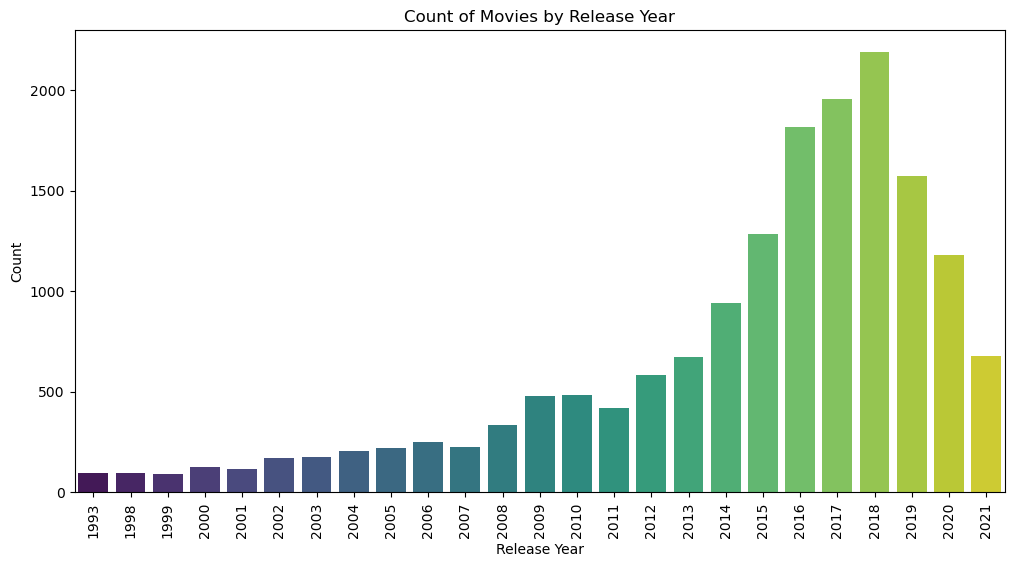

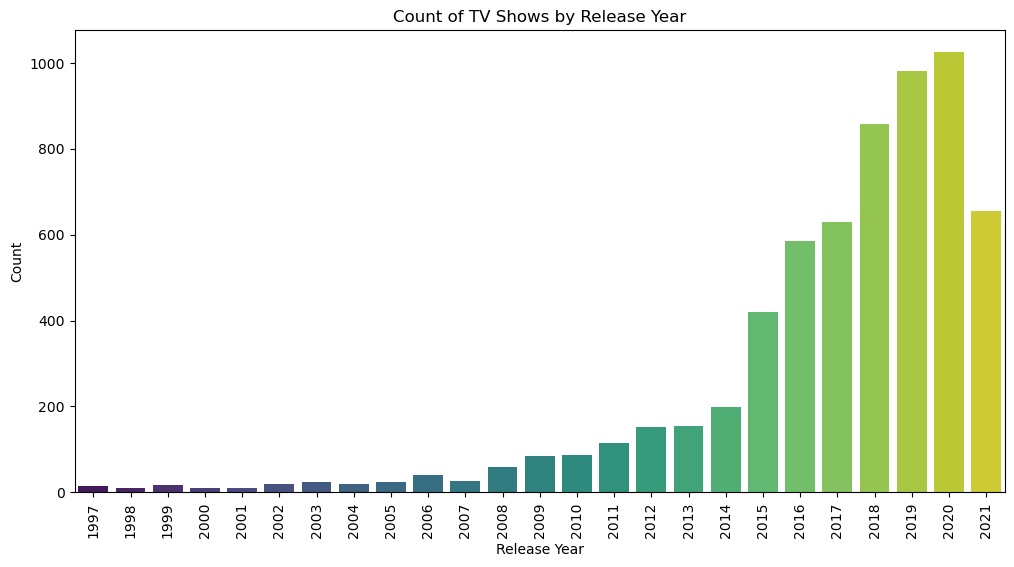

In [335]:
                                       # countplot for release_year

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 25 release years in movies
top_25_releaseyears = df_final_movies.loc[df_final_movies["release_year"].isin(top_25_years)]

# Plot countplot for movies
plt.figure(figsize=(12, 6))
sns.countplot(data=top_25_releaseyears, x="release_year", palette="viridis")
plt.xticks(rotation=90)
plt.title('Count of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Filter data for top 25 release years in TV shows
top_25_releaseyears1 = df_final_season.loc[df_final_season["release_year"].isin(top_25_years1)]

# Plot countplot for TV shows
plt.figure(figsize=(12, 6))
sns.countplot(data=top_25_releaseyears1, x="release_year", palette="viridis")
plt.xticks(rotation=90)
plt.title('Count of TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


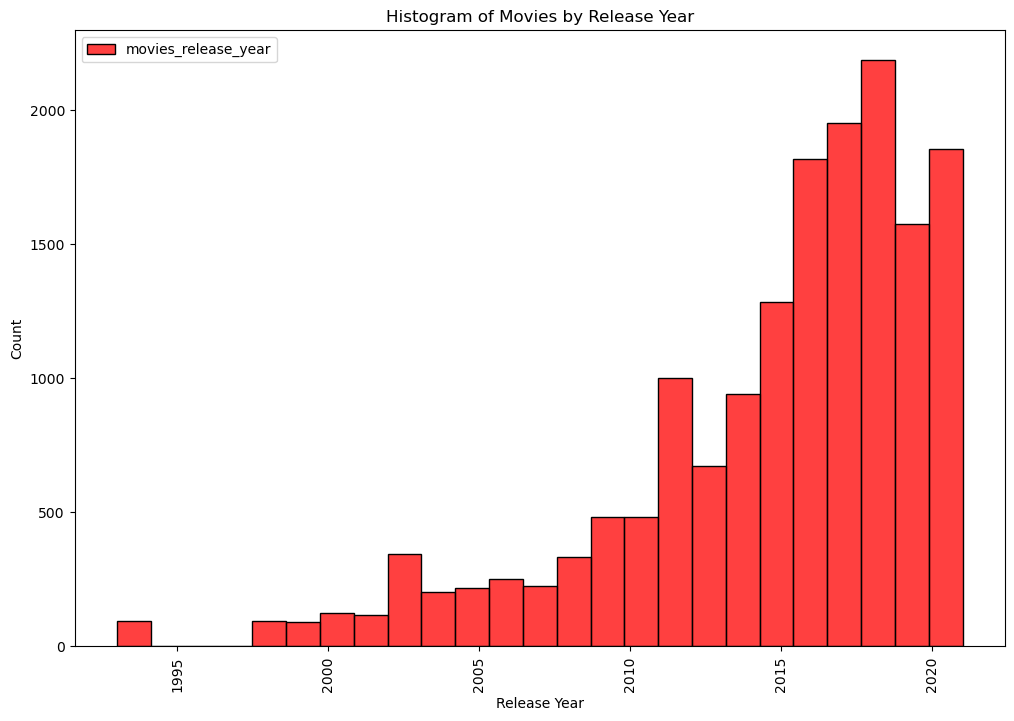

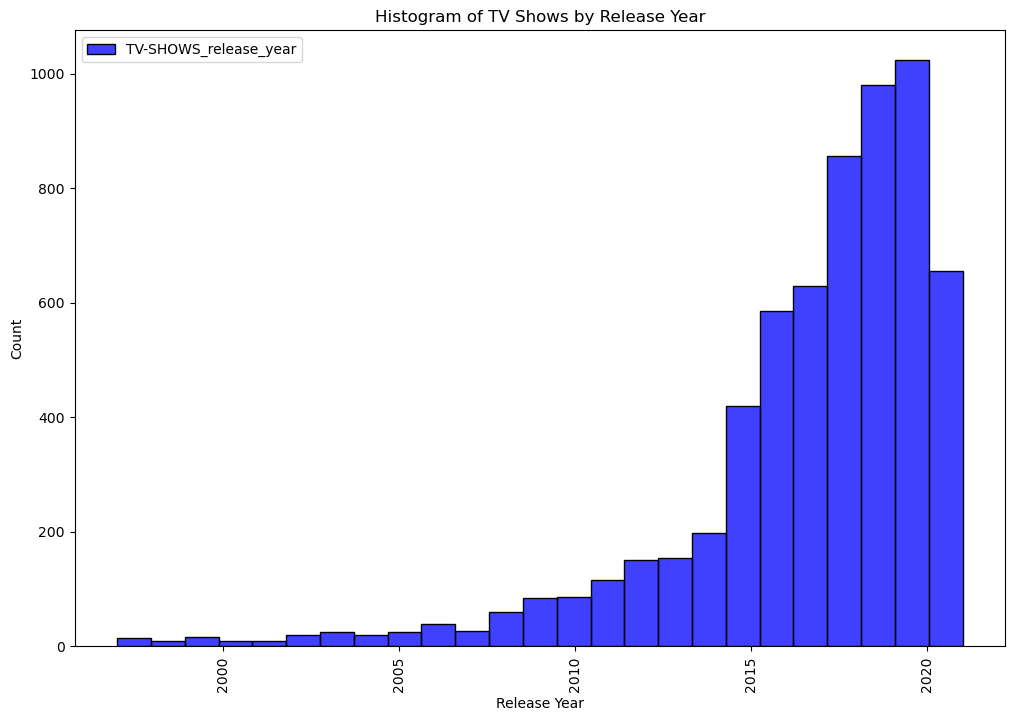

In [336]:
                                    # histplot for release_year

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 25 release years in movies
top_25_releaseyears = df_final_movies.loc[df_final_movies["release_year"].isin(top_25_years)]

# Plot histogram for movies
plt.figure(figsize=(12, 8))
sns.histplot(data=top_25_releaseyears, x="release_year", color="red", bins=len(top_25_years))
plt.xticks(rotation=90)
plt.title('Histogram of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(["movies_release_year","counts"]) 
plt.show()

# Filter data for top 25 release years in TV shows
top_25_releaseyears1 = df_final_season.loc[df_final_season["release_year"].isin(top_25_years1)]

# Plot histogram for TV shows
plt.figure(figsize=(12, 8))
sns.histplot(data=top_25_releaseyears1, x="release_year", color="blue", bins=len(top_25_years1))
plt.xticks(rotation=90)
plt.title('Histogram of TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(["TV-SHOWS_release_year"])
plt.show()


C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

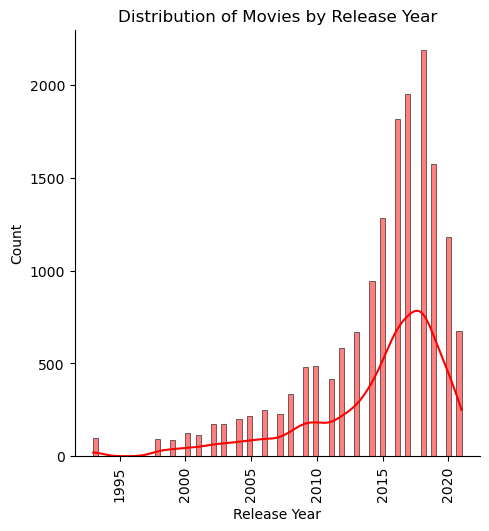

C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

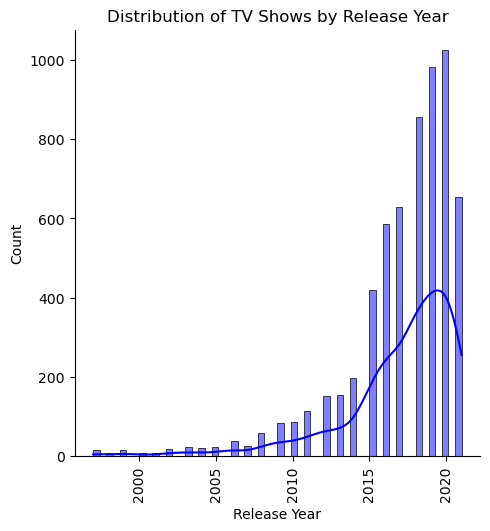

In [337]:
                                  # Displot for Release_years
    
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 25 release years in movies
top_25_releaseyears = df_final_movies.loc[df_final_movies["release_year"].isin(top_25_years)]

# Plot displot for movies
plt.figure(figsize=(12, 8))
sns.displot(data=top_25_releaseyears, x="release_year", color="red", kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Filter data for top 25 release years in TV shows
top_25_releaseyears1 = df_final_season.loc[df_final_season["release_year"].isin(top_25_years1)]

# Plot displot for TV shows
plt.figure(figsize=(12, 8))
sns.displot(data=top_25_releaseyears1, x="release_year", color="blue", kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


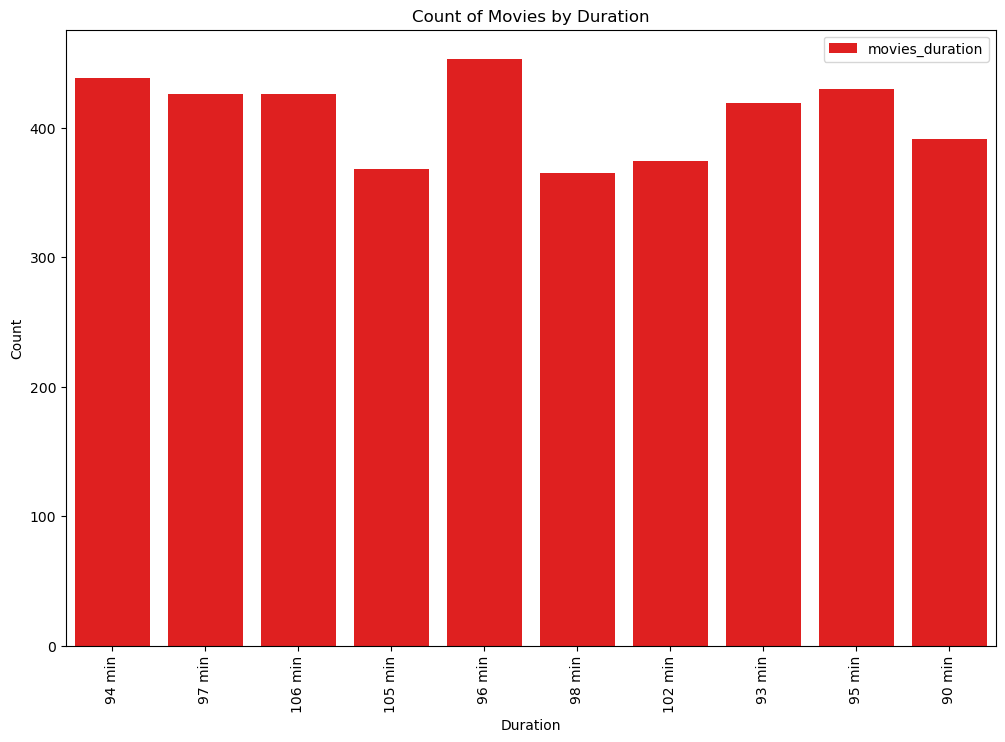

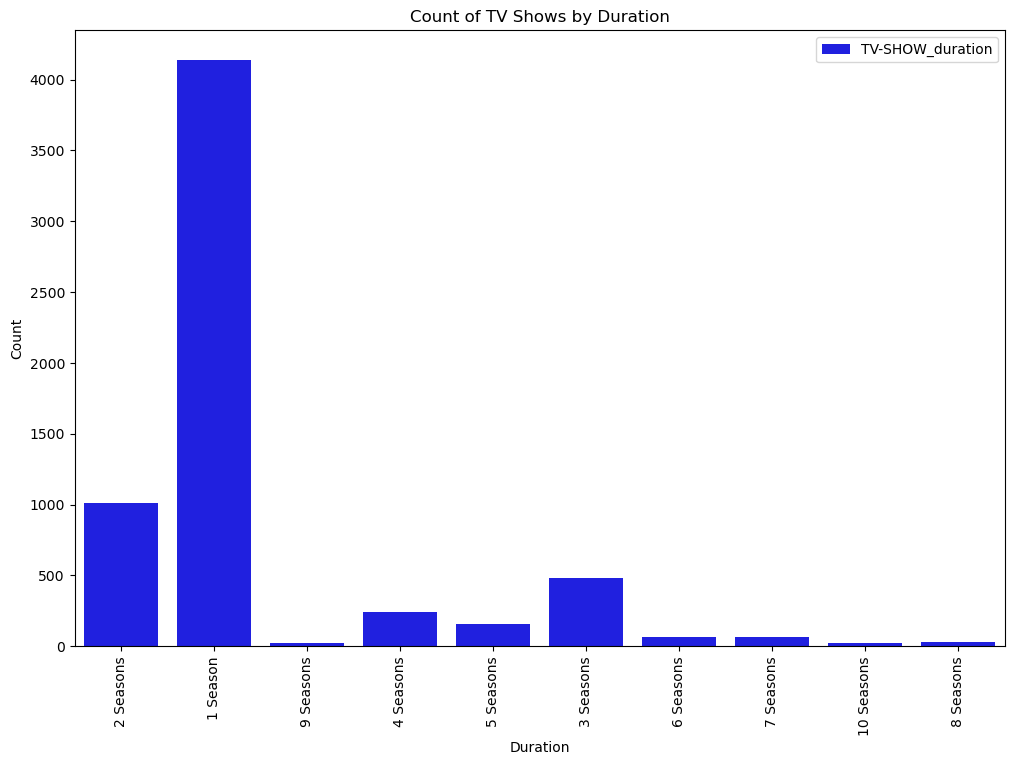

In [338]:
                                   #Countplot for duration
    
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 10 durations in movies
top_10_duration_movies = df_final_movies.loc[df_final_movies["duration"].isin(top_10_duration)]

# Plot countplot for movies
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_duration_movies, x="duration", color="red")
plt.xticks(rotation=90)
plt.title('Count of Movies by Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend(["movies_duration"])
plt.show()

# Filter data for top 10 durations in TV shows
top_10_duration_season = df_final_season.loc[df_final_season["duration"].isin(top_10_duration1)]

# Plot countplot for TV shows
plt.figure(figsize=(12, 8))
sns.countplot(data=top_10_duration_season, x="duration", color="blue")
plt.xticks(rotation=90)
plt.title('Count of TV Shows by Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend(["TV-SHOW_duration"])
plt.show()


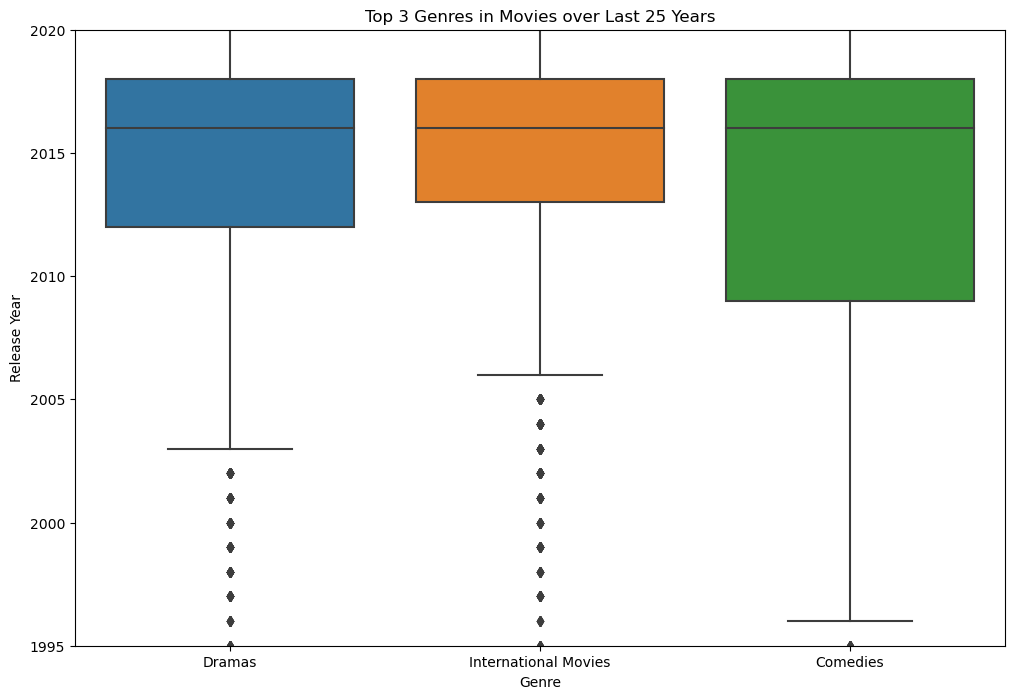

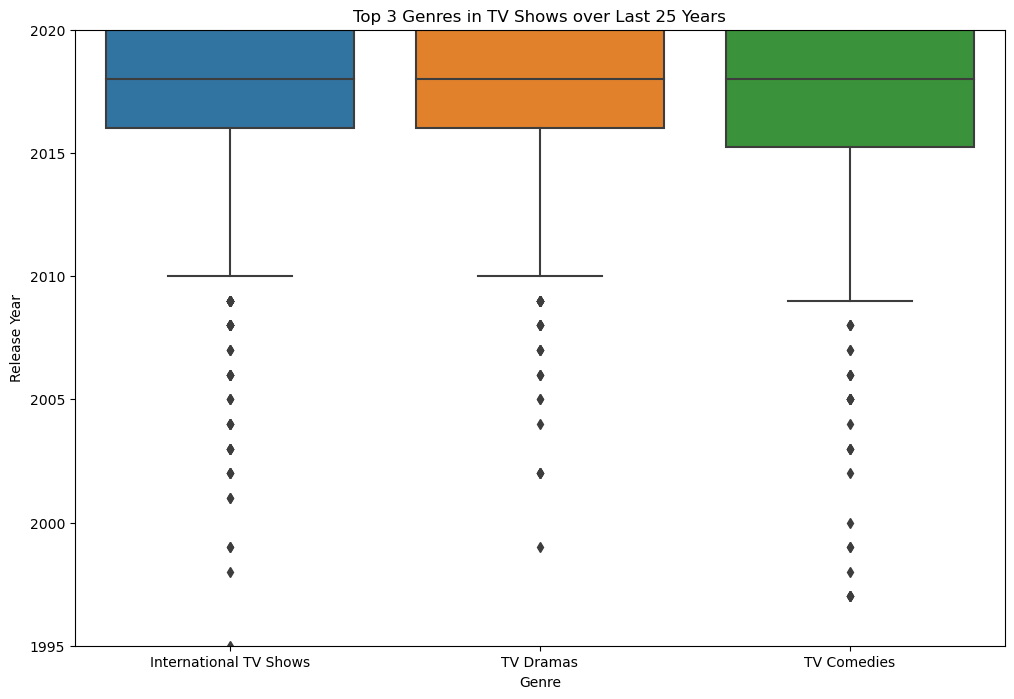

In [339]:
                                    # TOP 3 Genre v/s last 25 years


import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 3 genres in movies and TV shows
top_3_data_genres_movies = df_final_movies.loc[df_final_movies["Genre"].isin(top_3_genres)]
top_3_data_genres_seasons = df_final_season.loc[df_final_season["Genre"].isin(top_3_genres1)]

# Plotting for Movies
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_3_data_genres_movies, x="Genre", y="release_year")
plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
plt.title('Top 3 Genres in Movies over Last 25 Years')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.show()

# Plotting for TV Shows
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_3_data_genres_seasons, x="Genre", y="release_year")
plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
plt.title('Top 3 Genres in TV Shows over Last 25 Years')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.show()


In [340]:
                                # TOP 4 Actor v/s last 25 years

import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for top 4 actors in movies and TV shows
top_4_data_actors_movies = df_final_movies.loc[df_final_movies["Actors"].isin(top_3_actors)]
top_4_data_actors_seasons = df_final_season.loc[df_final_season["Actors"].isin(top_3_actors1)]

# Check if data frames are not empty
if not top_4_data_actors_movies.empty:
    # Plotting for Movies
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=top_4_data_actors_movies, x="Actors", y="release_year")
    plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
    plt.title('Top 4 Actors in Movies over Last 25 Years')
    plt.xlabel('Actor')
    plt.ylabel('Release Year')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("No data found for top actors in movies.")

if not top_4_data_actors_seasons.empty:
    # Plotting for TV Shows
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=top_4_data_actors_seasons, x="Actors", y="release_year")
    plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
    plt.title('Top 4 Actors in TV Shows over Last 25 Years')
    plt.xlabel('Actor')
    plt.ylabel('Release Year')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("No data found for top actors in TV shows.")


No data found for top actors in movies.


TypeError: unhashable type: 'list'

<Figure size 1200x800 with 0 Axes>

In [ ]:
                                # Directors v/s last 25 years
# For Movies:


# Filter data for top 4 directors in movies
top_3_data_directors = df_final_movies.loc[df_final_movies["director"].isin(top_3_directors)]

# Plotting for Movies
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_3_data_directors, x="director", y="release_year", color="red")
plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
plt.title('Top 3 Directors in Movies over Last 25 Years')
plt.xlabel('Director')
plt.ylabel('Release Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



# For TV Shows:

# Filter data for top 4 directors in TV shows
top_3_data_directors1 = df_final_season.loc[df_final_season["director"].isin(top_3_directors1)]

# Plotting for TV Shows
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_3_data_directors1, x="director", y="release_year", color="blue")
plt.ylim(bottom=1995, top=2020)  # Limiting y-axis to show last 25 years
plt.title('Top 4 Directors in TV Shows over Last 25 Years')
plt.xlabel('Director')
plt.ylabel('Release Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:

                                               # top Titles v/s last 10 years
#Movies
top_3_data_titles=df_final_movies.loc[(df_final_movies["title"].isin(top_3_titles))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["movies title"])
plt.xticks(rotation=90)
plt.show()

# TV-SHOWS
top_3_data_titles1=df_final_season.loc[(df_final_season["title"].isin(top_3_titles1))]
plt.figure(figsize=(12,8))
sns.boxplot(data=top_3_data_titles1,x="title",y="release_year",color="red")
plt.ylim(bottom=2010,top=2020)
plt.legend(["TV-SHOW title"])
plt.xticks(rotation=90)
plt.show()

 ### For correlation: Heatmaps, Pairplots (10 Points) 

In [341]:
top_data_actors_directors=df_final_movies.loc[(df_final_movies["Actors"].isin(top_3_actors)) & (df_final_movies["director"].isin(top_3_directors))]
top_data_actors_directors

,title,Actors,country,Genre,director,type,release_year,rating,duration,month


C:\Users\okomk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(1995.0, 2020.0)

<Figure size 2000x1500 with 0 Axes>

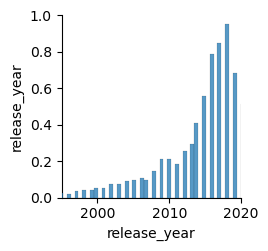

In [342]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df_final_movies)
plt.xlim(left=1995,right=2020)
# plt.ylim(bottom=0,top=1)

### Insights based on Non-Graphical and Visual Analysis (10 Points)
1 Comments on the range of attributes

2 Comments on the distribution of the variables and relationship between them

3 Comments for each univariate and bivariate plot



#### 1
Comments on the range of attributes

1. Based on the given data we observe that there are wide variety of Genres nowdays
2. The platform helps the user to display the most watched shows

#### 2
1. Through the data we have have observe there are relationship betwwen directors , casting and actors.
2. As the years are moving forward the Rating depend directly on cast and type of Genre title belogs too

#### 3
For univariate plots 1.As the years are moving craze in people for seeing movies and tv-shows are increasing 2.For the duration I see that in movies people like to watch movies duration between 90 to 100 minutes time interval and for tv shows people has high craze for shows having 1 or 2 seasons

For bivariate plots 1.People like to watch high rating movies and shows

 ### Business Insights - Should include patterns observed in the data along with what you can infer from it 

### For every below plots insight number and result is mentioned

<Axes: xlabel='type', ylabel='count'>

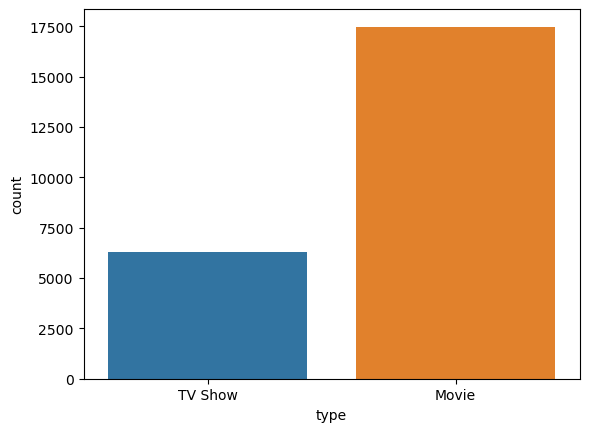

In [344]:
# INSIGHT 1
sns.countplot(data=df_final,x="type")

# RESULT--SHOWS DEMAND OF MOVIES IS MORE THEN TV SHOWS

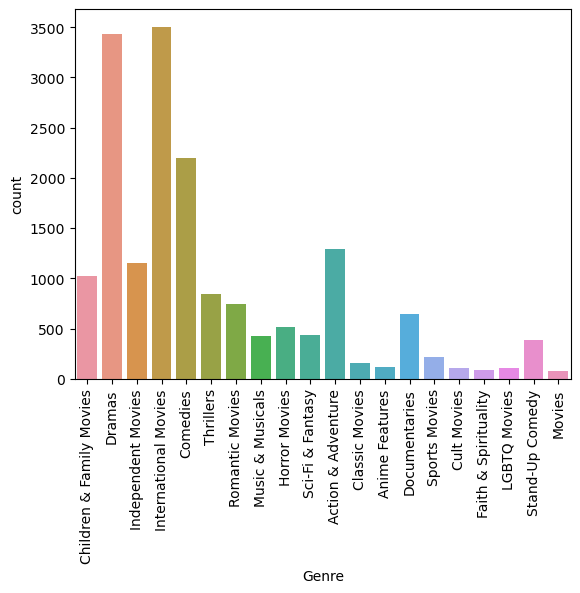

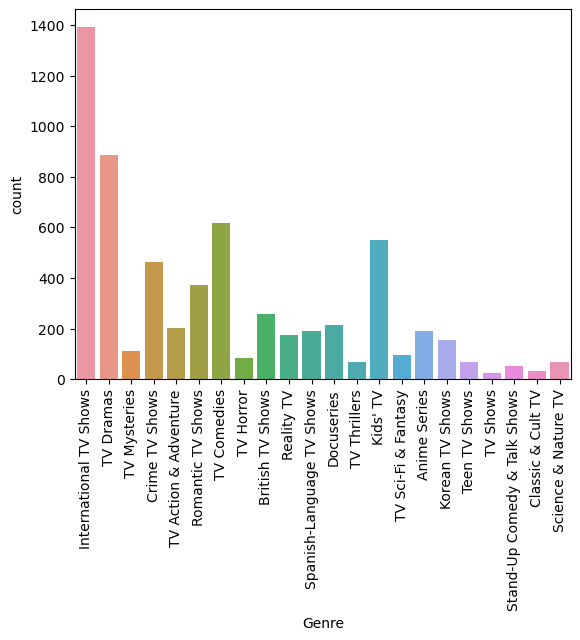

In [345]:
# INSIGHT 2
#movies
sns.countplot(data=df_final_movies,x="Genre")
plt.xticks(rotation=90)
plt.show()

#seasons
sns.countplot(data=df_final_season,x="Genre")
plt.xticks(rotation=90)
plt.show()

## RESULT--
## From the below data we can observe people needs more dramas movies and internation tv shows

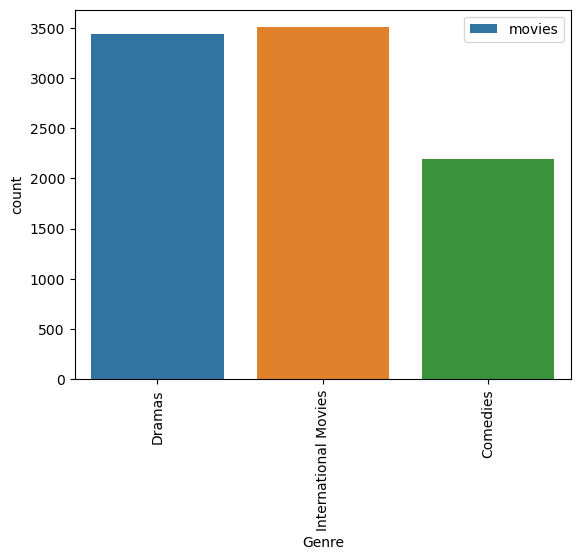

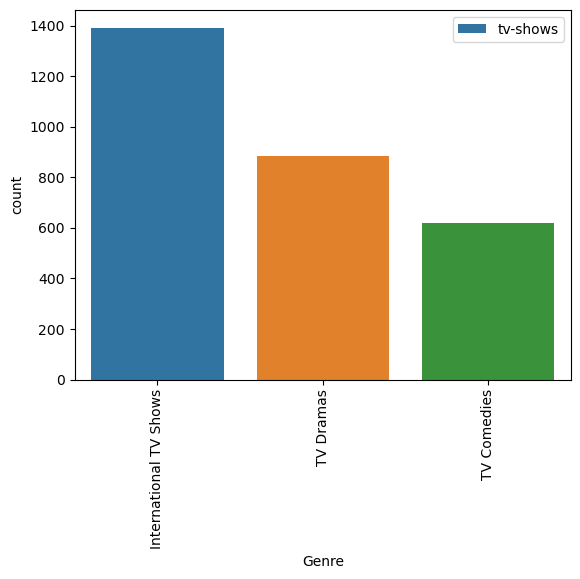

In [346]:
# INSIGHT 3
#movies
top_3_data_Genres=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres))]
sns.countplot(data=top_3_data_Genres,x="Genre")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()

#season
top_3_data_Genres1=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1))]
sns.countplot(data=top_3_data_Genres1,x="Genre")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

# RESULT--
## FROM THE BELOW GRAPH WE SEE TOP 3 GENRES IN MOVIES ARE DRAMAS, INTERNATIONAL MOVIES, COMEDIES
## TOP 3 GENRES IN TV SHOWS ARE INTERNATIONAL TV SHOWS,DRAMAS, TV COMEDIES

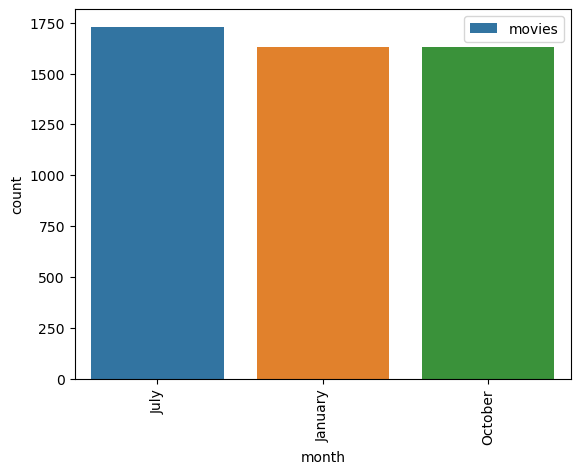

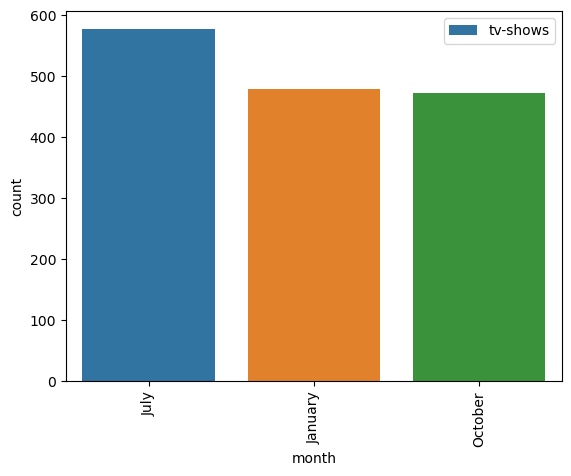

In [347]:
# INSIGHT 4
# movies
top_3_data_months=df_final_movies.loc[(df_final_movies["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months,x="month")
plt.xticks(rotation=90)
plt.legend(["movies"])
plt.show()
#seasons
top_3_data_months1=df_final_season.loc[(df_final_season["month"].isin(top_3_months))]
sns.countplot(data=top_3_data_months1,x="month")
plt.xticks(rotation=90)
plt.legend(["tv-shows"])
plt.show()

# RESULT--
# FROM THE BELOW WE SEE PEOPLE LIKE MORE MOVIES AND TV-SHOWS TO RELEASE IN MONTH OF JULY, JANUARY, OCTOBER

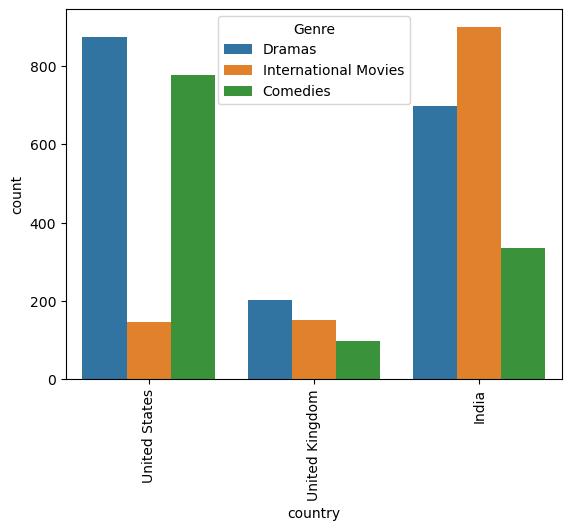

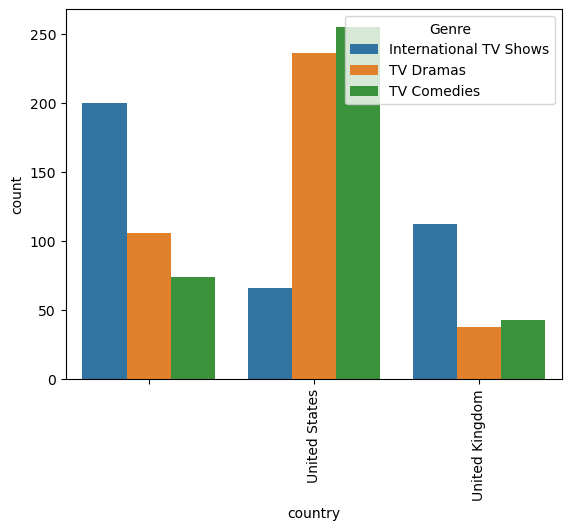

In [354]:
# INSIGHT 5

#movies
top_3_data_Genres_countries=df_final_movies.loc[(df_final_movies["Genre"].isin(top_3_genres)) & (df_final_movies["country"].isin(top_3_countries))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
# plt.legend(["movies"])
plt.show()
#seasons
top_3_data_Genres_countries=df_final_season.loc[(df_final_season["Genre"].isin(top_3_genres1)) & (df_final_season["country"].isin(top_3_countries1))]
sns.countplot(data=top_3_data_Genres_countries,x="country",hue="Genre")
plt.xticks(rotation=90)
plt.show()


# RESULT--
# FROM BELOW WE SEE TOP 3 GENRES IN TOP 3 COUNTRIES I.E IN US PEOPLE LIKE TO WATCH COMEDIES,UK--DRAMAS,INDIA--INTERNATIONAL MOVIES
## FOR TV SHOWS US--TV DRAMAS, UK--INTERNATIONAL TV SHOWS, JAPAN--INTERNATIONAL TV SHOWS
## NOTE IN BOTH MOVIES AND TV SHOWS UNITED STATES AND UNITED KINGDOM ARE TOP CONSISTENT PALYERS

Text(0.5, 1.0, 'release_year v/s rating')

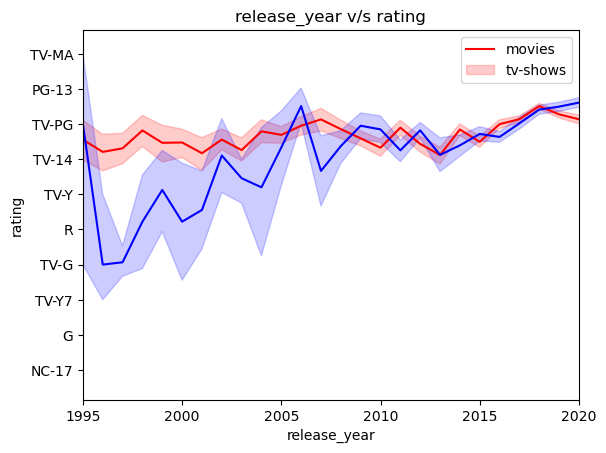

In [355]:
# INSIGHT 6

#movies and seasons
sns.lineplot(data=df_final_movies,
            x="release_year",
            y="rating",color="red")
plt.xlim(left=1995,right=2020)
sns.lineplot(data=df_final_season,
            x="release_year",
            y="rating",color="blue")
plt.xlim(left=1995,right=2020)
plt.legend(["movies","tv-shows"])
plt.title("release_year v/s rating")

# RESULT--
# IN CASE OF MOVIES RATINGS OVER LAST 25 YEARS REAMINS AT SAME LEVEL ALMOST
# IN CASE OF TV SHOWS RATING LEVEL INCREASE DRASTICALLY AND IT IS GOOD TO SEE PEOPLE LIKE TV SHOWS MORE

### Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

1. Netfix should focus on more movies content then Tv-shows.

2. Netflix should also focus on rating of movies as for lst 25 years rating have no growth, so it is important to change movies content to increase level so that rating in coming years increase as same as ratings of tv-shows.

3. Netflix should more focus for content from countries like united states, UK, japan, India.

4. Netflix for better revenue should ask directors to release shows more in months of january,july,october.

5. Netflix should more focus on Comedy Genre type movies and international tv shows for TV-SHOWS.

6. Netflix should upload more movies of actors like Alfred Molina,Liam Neeson, John Krasinski and for TV-SHOWS it should be of actors like Yuki Kaji,Takahiro Sakurai,David Attenborogh.

7. Netflix should upload more movies of directors like Youssef Chahine,Martin Scorsese,cathy garcia and for tv shows it should be Houda Benyamina,Thomas Astruc, Noam Murro.

8. Netflix should more focus on duaration of movies between 90-110 minutes and for tv-shows it should be 1-2 seasons for better growth.

9. Netflix can also see other similar platforms growth that in which region they are more focusing.